### Dataset Description
This dataset appeared in a 1997 paper titled Sparse Spatial Autoregressions by Pace, R. Kelley and Ronald Barry, published in the Statistics and Probability Letters journal. They built it using the 1990 California census data. It contains one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people)

## SYSTEM RELATED COMMANDS

In [1]:
%pwd

'C:\\Users\\Leo\\Desktop\\ml'

In [2]:
from platform import python_version
print(python_version())

3.11.13


## READ THE DATA INTO A DATAFRAME

In [3]:
## Read the housing.csv is in the current directory
import pandas as pd 
housingdf = pd.read_csv('housing.csv')
#housingdf = pd.read_csv('housing.csv', usecols=['longitude']) 
#housingdf = pd.read_csv('housing.csv', header=None) 
#housingdf = pd.read_csv(‘housing.cvs’, usecols=[0]) 
#housingdf = pd.read_csv(‘housing.csv’, usecols=[’longitude’])
#housingdf = pd.read_excel(‘housing.xlsx’)

## EXPLORE DATA

In [4]:
## This function returns the first n (default = 5) rows for the object based on position. 
## It is useful for quickly testing if your object has the right type of data in it.

housingdf.head(n=5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
## This method prints information about a DataFrame including the index dtype and columns, 
## non-null values and memory usage.

housingdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
## Generate descriptive statistics.
## Descriptive statistics include those that summarize the central tendency, dispersion and 
## shape of a dataset’s distribution, excluding NaN values.
## Analyzes both numeric and object series, as well as DataFrame column sets of mixed data types. 
## The output will vary depending on what is provided.

housingdf.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
## Return a Series containing counts of unique values.
## The resulting object will be in descending order 
## so that the first element is the most frequently-occurring element. Excludes NA values by default.

housingdf["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [8]:
housingdf.iloc[:,9]

0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
           ...   
20635      INLAND
20636      INLAND
20637      INLAND
20638      INLAND
20639      INLAND
Name: ocean_proximity, Length: 20640, dtype: object

## VISUALIZE DATA

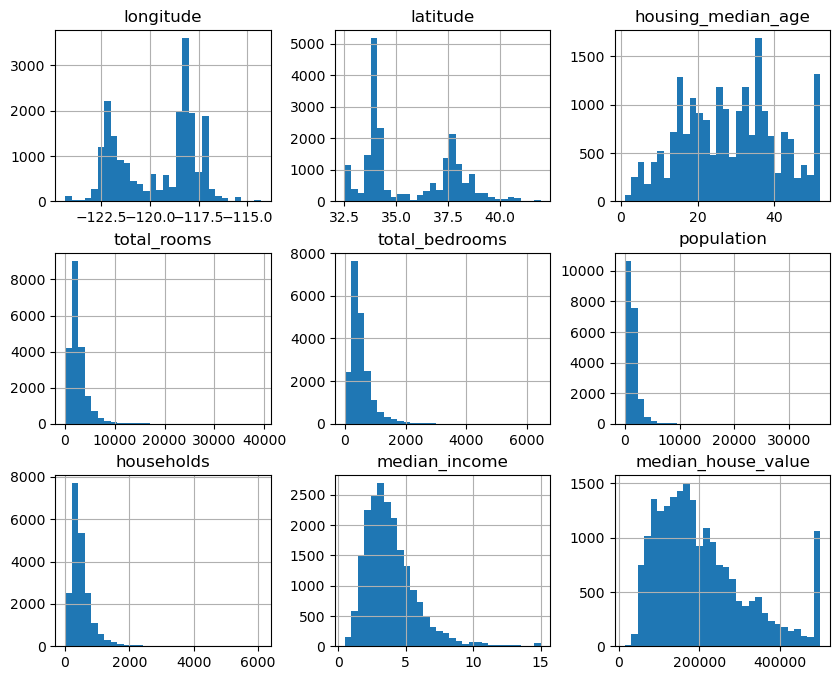

In [9]:
## Make a histogram of the DataFrame’s columns.
## A histogram is a representation of the distribution of data. 

%matplotlib inline  
import matplotlib.pyplot as plt

housingdf.hist(bins = 30, figsize = (10,8))
plt.show()

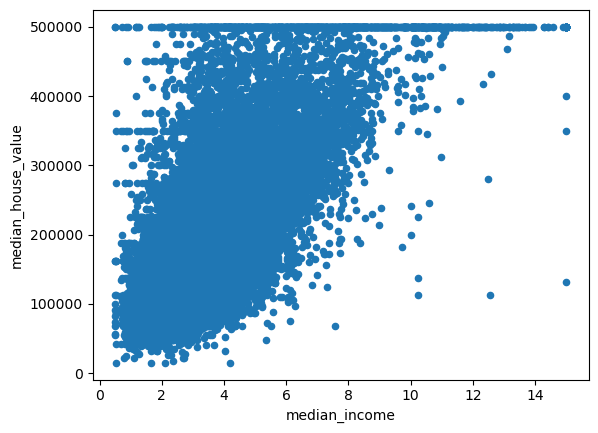

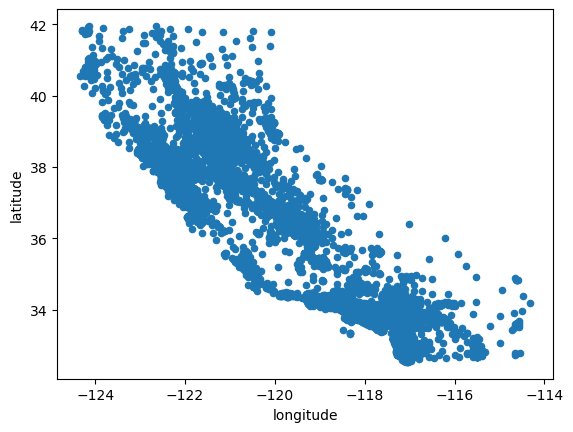

In [10]:
## Make plots of Series or DataFrame.

%matplotlib inline
import matplotlib.pyplot as plt
housingdf.plot(kind = "scatter", x="median_income", y = "median_house_value")
housingdf.plot(kind = "scatter", x="longitude", y = "latitude")
plt.show()

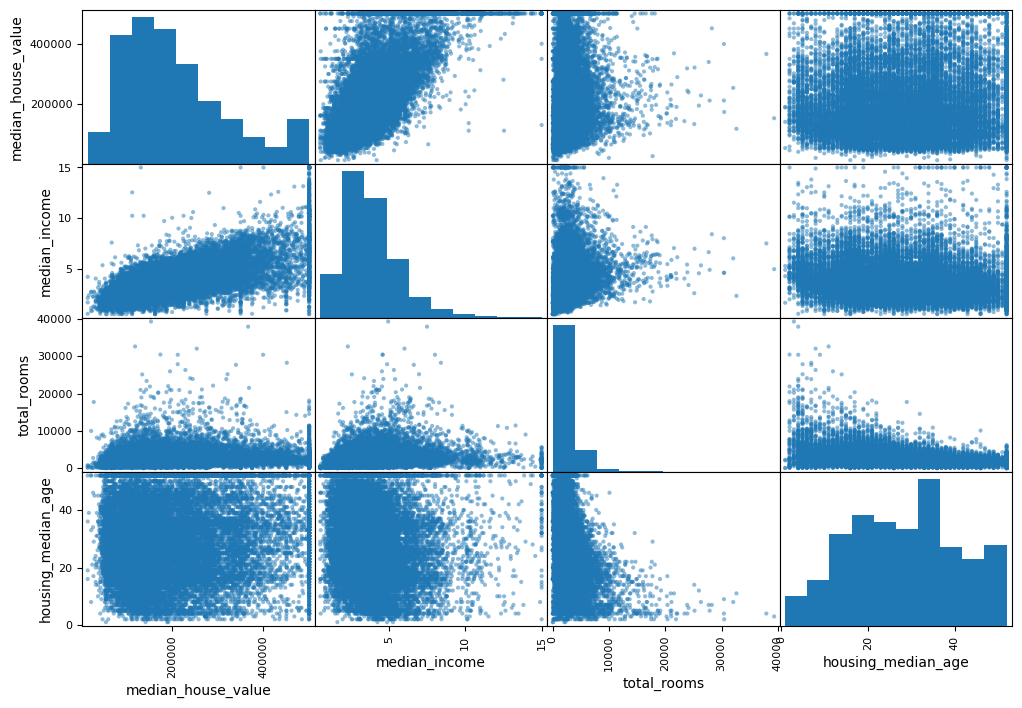

In [11]:
## Draw a matrix of scatter plots.

from pandas.plotting import scatter_matrix
attributes = ['median_house_value', 'median_income','total_rooms','housing_median_age']

scatter_matrix(housingdf[attributes], figsize = (12,8))
plt.show()

In [12]:
## Compute pairwise correlation of columns, excluding NA/null values.

## numeric_only=False
#corr_matrix
#corr_matrix ["median_house_value"].BLANK
corr_matrix = housingdf.corr(numeric_only=True)
corr_matrix
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

## PREPARE FOR ML ALGORITHMS

#### Dropping the rows with NA values (check cell #3 - )

In [13]:
housingdf.dropna(inplace = True)
housingdf.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


#### Converting categorical values to  numbers using one-hot-encoder 

In [14]:
housing_cat = housingdf[["ocean_proximity"]]
housing_cat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ocean_proximity  20433 non-null  object
dtypes: object(1)
memory usage: 319.3+ KB


In [15]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 20433 stored elements and shape (20433, 5)>

In [16]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [17]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

####  Train and Test Split

In [18]:
## Using SKLEARN library 
from sklearn.model_selection import train_test_split
housing_train_set, housing_test_set = train_test_split(housingdf,test_size = 0.25, random_state =42)
print(len(housing_train_set), "train +", len(housing_test_set), "test")


15324 train + 5109 test


In [19]:
## WRITING YOUR OWN FUNCTION
import numpy as np
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

housing_train_set, housing_test_set = split_train_test(housingdf, 0.5)
print(len(housing_train_set), "train +", len(housing_test_set), "test")

10217 train + 10216 test


#### Feature Scaling

In [20]:
X_train = housing_train_set[['median_house_value', 'median_income','total_rooms']].values
print("Training matrix size:", X_train.shape)

X_test = housing_test_set[['median_house_value', 'median_income','total_rooms']].values
print("Test matrix size:", X_test.shape)

Training matrix size: (10217, 3)
Test matrix size: (10216, 3)


In [21]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()

X_train_minmax = scaler.fit_transform(X_train)
X_test_minmax = scaler.transform(X_test)

print(X_train_minmax.min(axis=0), X_train_minmax.max(axis=0))

[0. 0. 0.] [1. 1. 1.]
